# Deciphering Road Accidents: A Deep Dive into Hidden Patterns and Risk Factors


## Business Understanding


### Problem statement
Our primary objective is to uncover hidden patterns and risk factors contributing to road accidents beyond commonly recognized factors like speeding and impaired driving. By identifying these additional risk elements, we aim to enhance road safety strategies, improve accident prevention measures, and reduce the severity of road accidents.
### Why this Topic
Road accidents are a major concern worldwide, causing injuries and deaths that have a profound impact on families and communities. In Kenya, road accidents remain a significant public health issue, with thousands of people losing their lives each year due to road-related incidents. Our dataset is Not specific to Kenya.  According to the World Health Organization (WHO), road traffic injuries are among the top 10 leading causes of death worldwiede, highlighting the urgent need for effective prevention strategies. By studying the reasons behind these accidents and identifying hidden patterns and risk factors, we can develop targeted interventions to improve road safety and reduce the number of accidents, injuries, and fatalities on roads worldwide.

### Domain
This project applies to the transportation and public safety domain, with potential implications for government agencies, transportation companies, and advocacy groups.
### Target Audience
Government policymakers, transportation experts, safety agencies, and the general public will benefit from insights and recommendations generated by this analysis.
### Real-World Impact
Implementation of findings could lead to a reduction in road accidents, injuries, fatalities, and associated economic costs on a global scale.
### Pre-existing Projects
Our project aims to uncover additional hidden factors and patterns using advanced data analysis techniques, complementing existing research on road accident causes and prevention strategies.

## Objectives

1. To identify Key Predictive Factors: Investigate the influence of various roadway and environmental factors (e.g., road surface, lighting conditions, weather) on crash occurrence and severity to identify key predictive attributes.
2. To assess Driver Behavior Impact: Analyze the correlation between driver behavior attributes (e.g., speed, alcohol/drug involvement) and crash severity to understand the role of driver actions in accidents.
3. To develop Early Warning Systems: Create predictive models to anticipate high-risk areas and times for accidents, enabling proactive measures such as enhanced law enforcement or targeted road safety campaigns.
4. To evaluate Infrastructure Vulnerability: Assess the impact of road infrastructure features (e.g., intersections, road markings) on crash frequency and severity to prioritize infrastructure improvements for accident prevention.
5. To optimize Resource Allocation: Utilize predictive analytics to optimize resource allocation for emergency response and medical services by forecasting the likelihood and severity of future accidents in specific regions or road segments.

### Data Understanding
* Data Collection:  Comprehensive road accident data will be collected from international sources, including government databases, police reports, healthcare records, and insurance databases.
* Source of Data: The dataset utilized for this analysis was obtained from the official New Zealand Government data website. It encompasses comprehensive information regarding road accidents spanning from the year 2000 through April 2024.

# Exploratory Data Analysis

### Understanding the data

In [1]:
# pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing the necessary libraries
import pandas as pd
from collections import Counter #simplifies counting occurrences of elements in a Python iterable by providing a dictionary-like object.
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_21624\1744073369.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Loading the dataset
df = pd.read_csv("data.csv")


In [4]:
#Checking out the first 10 rows
df.head(10)

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,178.031840,-38.669793,1,NaN,544801.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,175.264695,-37.785862,2,NaN,528900.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,174.751715,-36.708328,3,NaN,507000.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,172.394398,-43.609495,4,NaN,597513.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
4,168.385299,-46.417826,5,NaN,611500.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
5,169.739754,-46.262517,6,30.0,607300.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
6,174.982435,-41.159414,7,NaN,568101.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
7,174.937477,-37.062911,8,NaN,525420.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,1.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
8,175.235256,-37.751316,9,NaN,528403.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Open,0.0,NaN,NaN,Fine,Null
9,174.874776,-36.964072,10,NaN,523601.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,1.0,0.0,Fine,Null


In [5]:
#Checking the data shape
df.shape

(821744, 72)

In [6]:
# Checking out the data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          821744 non-null  float64
 1   Y                          821744 non-null  float64
 2   OBJECTID                   821744 non-null  int64  
 3   advisorySpeed              31344 non-null   float64
 4   areaUnitID                 821647 non-null  float64
 5   bicycle                    821739 non-null  float64
 6   bridge                     332913 non-null  float64
 7   bus                        821739 non-null  float64
 8   carStationWagon            821739 non-null  float64
 9   cliffBank                  332913 non-null  float64
 10  crashDirectionDescription  821744 non-null  object 
 11  crashFinancialYear         821744 non-null  object 
 12  crashLocation1             821744 non-null  object 
 13  crashLocation2             82

**Observations**
* Some columns have no data at all
* Some rows have missing data
* Some rows have the wrong data type

In [7]:
#Summary statistics
df.describe()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,tlaId,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,vanOrUtility,vehicle,waterRiver
count,821744.000000,821744.000000,8.217440e+05,31344.000000,821647.000000,821739.000000,332913.000000,821739.000000,821739.000000,332913.000000,...,818556.000000,332913.000000,332913.000000,332913.000000,332913.000000,821739.000000,821739.000000,821739.000000,332913.000000,332913.000000
mean,174.268497,-39.324055,6.541132e+05,54.437851,546241.601791,0.028963,0.013724,0.015870,1.311054,0.106319,...,52.409900,0.028815,0.048709,0.001511,0.101555,0.080399,0.003057,0.175788,0.025046,0.009967
std,5.565359,2.970823,3.797024e+05,18.175564,32537.949166,0.171136,0.117603,0.126396,0.784490,0.309588,...,24.000807,0.168825,0.216970,0.038841,0.305681,0.283694,0.056963,0.410052,0.158098,0.099696
min,-176.760762,-46.904849,1.000000e+00,15.000000,500100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.198951,-41.231382,3.296288e+05,40.000000,519400.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,174.784685,-37.889268,6.553465e+05,55.000000,536642.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.229901,-36.908110,9.881782e+05,65.000000,573523.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,178.544357,-34.430214,1.318963e+06,95.000000,626801.000000,5.000000,4.000000,3.000000,11.000000,3.000000,...,76.000000,4.000000,4.000000,1.000000,3.000000,5.000000,3.000000,6.000000,4.000000,2.000000


### Data cleaning

In [8]:
# Drop columns with above 80% missing data
df = df.drop(columns=['advisorySpeed', 'crashRoadSideRoad', 'holiday', 'intersection', 'pedestrian', 'weatherB', 'roadCharacter', 'temporarySpeedLimit', 'streetLight','objectThrownOrDropped'])

All columns missing 80% or more of the rows have been dropped.

In [9]:
# Checking the shape of the data after dropping columns
df.shape

(821744, 62)

In [10]:
# Checking the first 5 columns of the new dataset
df.head()

,X,Y,OBJECTID,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,...,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA
0,178.031840,-38.669793,1,544801.0,0.0,NaN,0.0,2.0,NaN,Null,...,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine
1,175.264695,-37.785862,2,528900.0,0.0,NaN,0.0,2.0,NaN,Null,...,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine
2,174.751715,-36.708328,3,507000.0,0.0,NaN,0.0,0.0,NaN,Null,...,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine
3,172.394398,-43.609495,4,597513.0,0.0,0.0,0.0,2.0,0.0,Null,...,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine
4,168.385299,-46.417826,5,611500.0,0.0,NaN,0.0,1.0,NaN,Null,...,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine


In [11]:
# Checking the percentage of missing values in every column
missing_percent = df.isnull().mean() * 100

# Print percentage of missing values in each column, using for loop so as to view all the columns
print("Percentage of missing values in each column:")
for column, percentage in missing_percent.items():
    print(f"{column}: {percentage:.2f}%")

Percentage of missing values in each column:
X: 0.00%
Y: 0.00%
OBJECTID: 0.00%
areaUnitID: 0.01%
bicycle: 0.00%
bridge: 59.49%
bus: 0.00%
carStationWagon: 0.00%
cliffBank: 59.49%
crashDirectionDescription: 0.00%
crashFinancialYear: 0.00%
crashLocation1: 0.00%
crashLocation2: 0.16%
crashSeverity: 0.00%
crashSHDescription: 0.00%
crashYear: 0.00%
debris: 59.49%
directionRoleDescription: 0.01%
ditch: 59.49%
fatalCount: 0.00%
fence: 59.49%
flatHill: 0.00%
guardRail: 59.49%
houseOrBuilding: 59.49%
kerb: 59.49%
light: 0.00%
meshblockId: 0.01%
minorInjuryCount: 0.00%
moped: 0.00%
motorcycle: 0.00%
NumberOfLanes: 0.22%
otherObject: 59.49%
otherVehicleType: 0.00%
overBank: 59.49%
parkedVehicle: 59.49%
phoneBoxEtc: 59.49%
postOrPole: 59.49%
region: 0.39%
roadLane: 0.00%
roadSurface: 0.00%
roadworks: 59.49%
schoolBus: 0.00%
seriousInjuryCount: 0.00%
slipOrFlood: 59.49%
speedLimit: 0.10%
strayAnimal: 59.49%
suv: 0.00%
taxi: 0.00%
tlaId: 0.39%
tlaName: 0.39%
trafficControl: 0.00%
trafficIsland: 59.4

The columns that have a 59% percentage of missing values contain data with obstacles and therefore cannot be dropped as they contain a large percentage of the data

In [12]:
df.shape

(821744, 62)

In [13]:
# changing the column name vehicle to attendedVehicle and parkedVehicle to unattendedVehicle

df.rename(columns={'parkedVehicle': 'unattendedVehicle', 'vehicle': 'attendedVehicle'}, inplace=True)

# Verify the new column names
print(df.columns)


Index(['X', 'Y', 'OBJECTID', 'areaUnitID', 'bicycle', 'bridge', 'bus',
       'carStationWagon', 'cliffBank', 'crashDirectionDescription',
       'crashFinancialYear', 'crashLocation1', 'crashLocation2',
       'crashSeverity', 'crashSHDescription', 'crashYear', 'debris',
       'directionRoleDescription', 'ditch', 'fatalCount', 'fence', 'flatHill',
       'guardRail', 'houseOrBuilding', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'otherObject', 'otherVehicleType', 'overBank', 'unattendedVehicle',
       'phoneBoxEtc', 'postOrPole', 'region', 'roadLane', 'roadSurface',
       'roadworks', 'schoolBus', 'seriousInjuryCount', 'slipOrFlood',
       'speedLimit', 'strayAnimal', 'suv', 'taxi', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSign', 'train', 'tree',
       'truck', 'unknownVehicleType', 'urban', 'vanOrUtility',
       'attendedVehicle', 'waterRiver', 'weatherA'],
      dtype='object')


In [14]:
# Creating a new column combining Y and X values called coordinates 
df['coordinates'] = list(zip(df['Y'], df['X']))

# Drop the original X and Y columns
df.drop(['X', 'Y'], axis=1, inplace=True)

# Rearrange so that 'coordinates' is the first column
columns = ['coordinates'] + [col for col in df.columns if col != 'coordinates']
df = df[columns]

The **obstacle columns** are the columns that contain items that were involved in road accidents.
A new column called obstacles will be created to input all those obstacles in one column.

In [15]:
# Extended list of columns including both vehicle types and obstacles
# Since casStationWagon has a large amount of data, it will be excluded from being used as an obstacle. 
columns = [
    'bus', 'carStationWagon', 'motorcycle', 'bicycle', 'otherVehicleType', 
    'schoolBus', 'suv', 'taxi', 'train', 'truck', 'vanOrUtility', 'bridge', 
    'cliffBank', 'debris', 'ditch', 'fence', 'houseOrBuilding', 'kerb', 'moped', 
    'overBank', 'unattendedVehicle', 'phoneBoxEtc', 'postOrPole', 'roadworks', 
    'slipOrFlood', 'strayAnimal', 'trafficIsland', 'trafficSign', 'tree', 
    'attendedVehicle', 'waterRiver','guardRail','otherObject'
]

# Create the new 'summary' column by checking each column listed
df['obstacles'] = df.apply(
    lambda row: ', '.join([col for col in columns if row[col] > 0]),
    axis=1
)

# Example of printing the updated DataFrame to check the new 'summary' column
print(df[['obstacles']].head())
# 

                             obstacles
0                      carStationWagon
1                      carStationWagon
2                         vanOrUtility
3  carStationWagon, fence, otherObject
4        carStationWagon, vanOrUtility


In [16]:
# a count of the number of times each obstacle appears in an accident. 

# Flatten the list of all categories mentioned in the summary
all_categories = [item for sublist in df['obstacles'].str.split(', ').tolist() for item in sublist if item != '']
category_counts = Counter(all_categories)

# Convert to DataFrame for easier handling and visualization
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])
print(category_df.sort_values(by='Count', ascending=False))


             Category   Count
0     carStationWagon  711257
1        vanOrUtility  135279
16  unattendedVehicle   81561
11                suv   81445
2               fence   69193
6               truck   63476
12         postOrPole   40661
20          cliffBank   35260
10               tree   33447
15              ditch   31201
8          motorcycle   29004
5           guardRail   25448
13            bicycle   23400
14        trafficSign   16103
4            overBank   14521
24                bus   12900
9                kerb   11722
23      trafficIsland    9510
21               taxi    8536
7     attendedVehicle    8251
25    houseOrBuilding    7788
3         otherObject    7724
18              moped    5805
27             bridge    4525
17   otherVehicleType    4174
29        phoneBoxEtc    4116
19         waterRiver    3306
22             debris    2539
32        strayAnimal    1070
30          roadworks     935
28        slipOrFlood     815
31          schoolBus     612
26        

In [17]:
## Columns reduction
df.drop(columns=columns, inplace=True)

# Verify the drop by displaying the remaining columns
print(df.columns)


Index(['coordinates', 'OBJECTID', 'areaUnitID', 'crashDirectionDescription',
       'crashFinancialYear', 'crashLocation1', 'crashLocation2',
       'crashSeverity', 'crashSHDescription', 'crashYear',
       'directionRoleDescription', 'fatalCount', 'flatHill', 'light',
       'meshblockId', 'minorInjuryCount', 'NumberOfLanes', 'region',
       'roadLane', 'roadSurface', 'seriousInjuryCount', 'speedLimit', 'tlaId',
       'tlaName', 'trafficControl', 'unknownVehicleType', 'urban', 'weatherA',
       'obstacles'],
      dtype='object')


In [18]:
# Checking the data shape after dropping columns
df.shape

(821744, 29)

In [19]:
# Calculate the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

print(missing_percentages)

coordinates                  0.000000
OBJECTID                     0.000000
areaUnitID                   0.011804
crashDirectionDescription    0.000000
crashFinancialYear           0.000000
crashLocation1               0.000000
crashLocation2               0.155036
crashSeverity                0.000000
crashSHDescription           0.000000
crashYear                    0.000000
directionRoleDescription     0.008762
fatalCount                   0.000122
flatHill                     0.000000
light                        0.000000
meshblockId                  0.011804
minorInjuryCount             0.000122
NumberOfLanes                0.220628
region                       0.387955
roadLane                     0.000000
roadSurface                  0.000000
seriousInjuryCount           0.000122
speedLimit                   0.101978
tlaId                        0.387955
tlaName                      0.387955
trafficControl               0.000000
unknownVehicleType           0.000608
urban       

In [20]:
# Drop missing data
df.dropna(inplace=True)

df.head()


,coordinates,OBJECTID,areaUnitID,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,...,roadSurface,seriousInjuryCount,speedLimit,tlaId,tlaName,trafficControl,unknownVehicleType,urban,weatherA,obstacles
0,"(-38.6697929133221, 178.031839712928)",1,544801.0,Null,2011/2012,SH 35 WAINUI,HIRINI ST,Non-Injury Crash,Yes,2011,...,Sealed,0.0,50.0,28.0,Gisborne District,Give way,0.0,Urban,Fine,carStationWagon
1,"(-37.7858623185866, 175.264694847102)",2,528900.0,Null,2011/2012,HALL ST,LAKE ROAD,Non-Injury Crash,No,2012,...,Sealed,0.0,50.0,16.0,Hamilton City,Traffic Signals,0.0,Urban,Fine,carStationWagon
2,"(-36.7083284317848, 174.751714575468)",3,507000.0,Null,2012/2013,SHARON ROAD,RIDGE ROAD,Minor Crash,No,2012,...,Sealed,0.0,50.0,76.0,Auckland,Nil,0.0,Urban,Fine,vanOrUtility
3,"(-43.6094954873462, 172.394397590653)",4,597513.0,Null,2011/2012,SPRINGSTON ROLLESTON ROAD,DYNES ROAD,Non-Injury Crash,No,2011,...,Sealed,0.0,100.0,62.0,Selwyn District,Nil,0.0,Open,Fine,"carStationWagon, fence, otherObject"
4,"(-46.417825615584, 168.385299484149)",5,611500.0,Null,2011/2012,TWEED ST,INGLEWOOD ROAD,Non-Injury Crash,No,2011,...,Sealed,0.0,50.0,75.0,Invercargill City,Give way,0.0,Urban,Fine,"carStationWagon, vanOrUtility"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815786 entries, 0 to 821743
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   coordinates                815786 non-null  object 
 1   OBJECTID                   815786 non-null  int64  
 2   areaUnitID                 815786 non-null  float64
 3   crashDirectionDescription  815786 non-null  object 
 4   crashFinancialYear         815786 non-null  object 
 5   crashLocation1             815786 non-null  object 
 6   crashLocation2             815786 non-null  object 
 7   crashSeverity              815786 non-null  object 
 8   crashSHDescription         815786 non-null  object 
 9   crashYear                  815786 non-null  int64  
 10  directionRoleDescription   815786 non-null  object 
 11  fatalCount                 815786 non-null  float64
 12  flatHill                   815786 non-null  object 
 13  light                      815786 

### Feature Engineering

In [22]:
# Previewing the data 
df.head()

,coordinates,OBJECTID,areaUnitID,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,...,roadSurface,seriousInjuryCount,speedLimit,tlaId,tlaName,trafficControl,unknownVehicleType,urban,weatherA,obstacles
0,"(-38.6697929133221, 178.031839712928)",1,544801.0,Null,2011/2012,SH 35 WAINUI,HIRINI ST,Non-Injury Crash,Yes,2011,...,Sealed,0.0,50.0,28.0,Gisborne District,Give way,0.0,Urban,Fine,carStationWagon
1,"(-37.7858623185866, 175.264694847102)",2,528900.0,Null,2011/2012,HALL ST,LAKE ROAD,Non-Injury Crash,No,2012,...,Sealed,0.0,50.0,16.0,Hamilton City,Traffic Signals,0.0,Urban,Fine,carStationWagon
2,"(-36.7083284317848, 174.751714575468)",3,507000.0,Null,2012/2013,SHARON ROAD,RIDGE ROAD,Minor Crash,No,2012,...,Sealed,0.0,50.0,76.0,Auckland,Nil,0.0,Urban,Fine,vanOrUtility
3,"(-43.6094954873462, 172.394397590653)",4,597513.0,Null,2011/2012,SPRINGSTON ROLLESTON ROAD,DYNES ROAD,Non-Injury Crash,No,2011,...,Sealed,0.0,100.0,62.0,Selwyn District,Nil,0.0,Open,Fine,"carStationWagon, fence, otherObject"
4,"(-46.417825615584, 168.385299484149)",5,611500.0,Null,2011/2012,TWEED ST,INGLEWOOD ROAD,Non-Injury Crash,No,2011,...,Sealed,0.0,50.0,75.0,Invercargill City,Give way,0.0,Urban,Fine,"carStationWagon, vanOrUtility"


### visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_21624\2644463341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Category', data=category_df.sort_values(by='Count', ascending=False), palette='viridis')


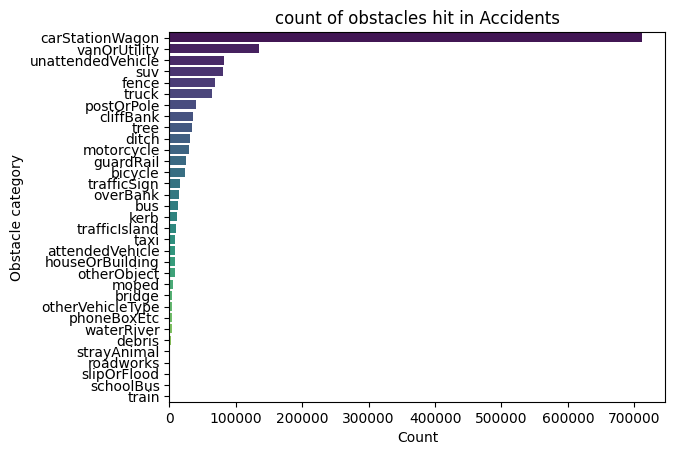

In [23]:
 # A plot of 
# Create a barplot
ax = sns.barplot(x='Count', y='Category', data=category_df.sort_values(by='Count', ascending=False), palette='viridis')

# Set title and labels
ax.set_title('count of obstacles hit in Accidents')
ax.set_xlabel('Count')
ax.set_ylabel('Obstacle category')

# Show the plot
plt.show()

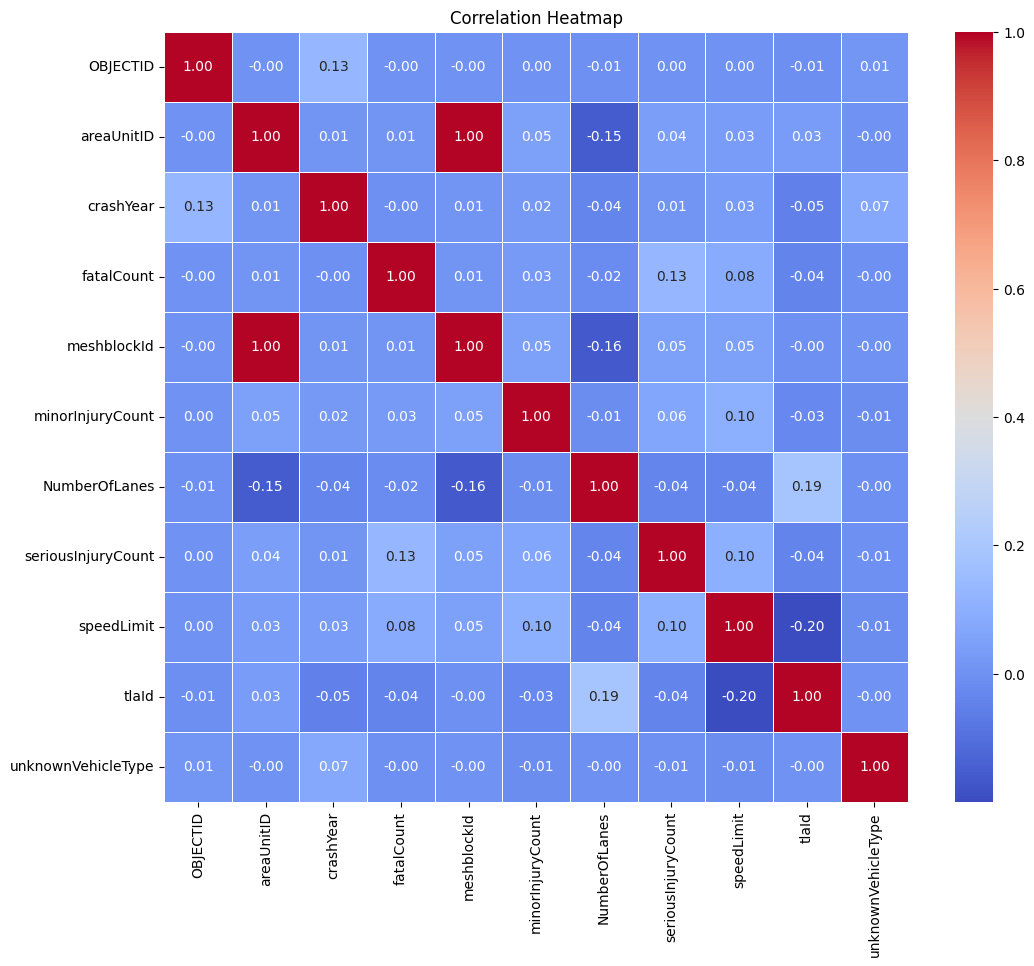

In [24]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21624\1577517456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='crashSeverity', data=df, palette='viridis')


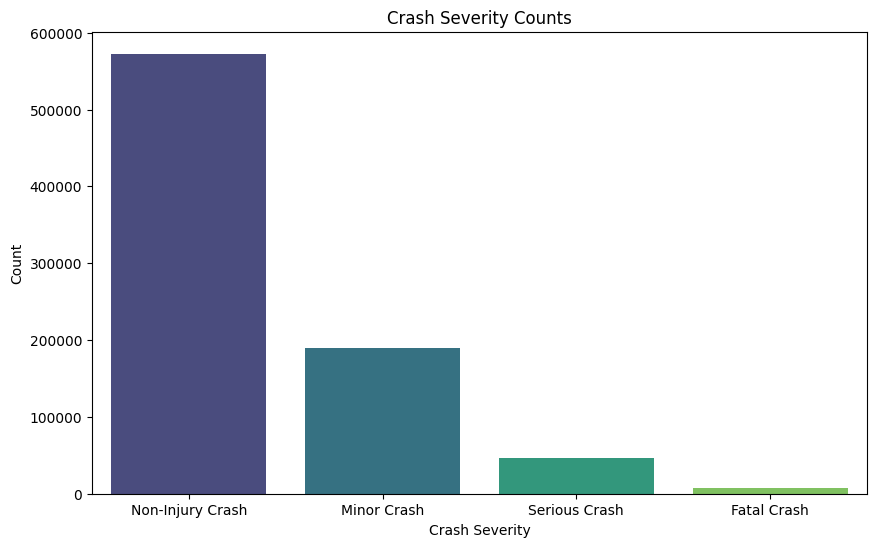

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='crashSeverity', data=df, palette='viridis')
plt.title('Crash Severity Counts')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.show()


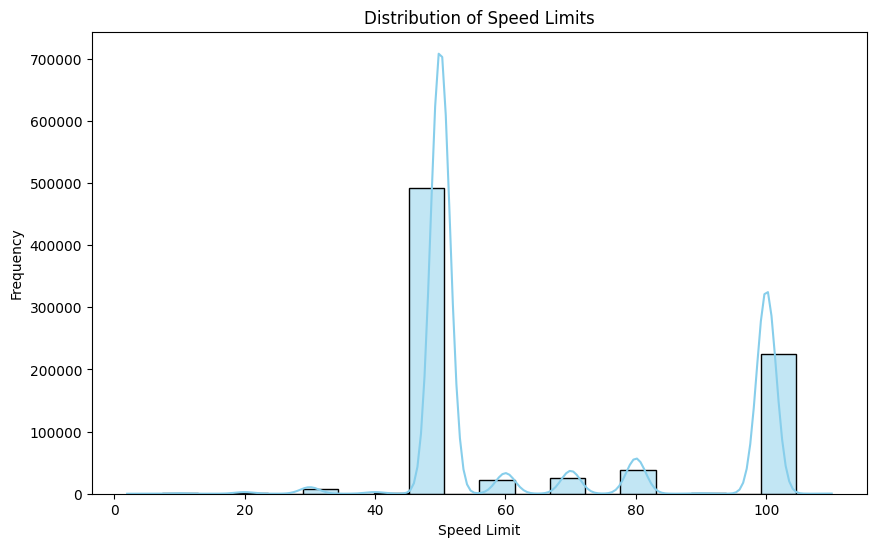

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['speedLimit'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21624\2355913892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='urban', data=df, palette='pastel')


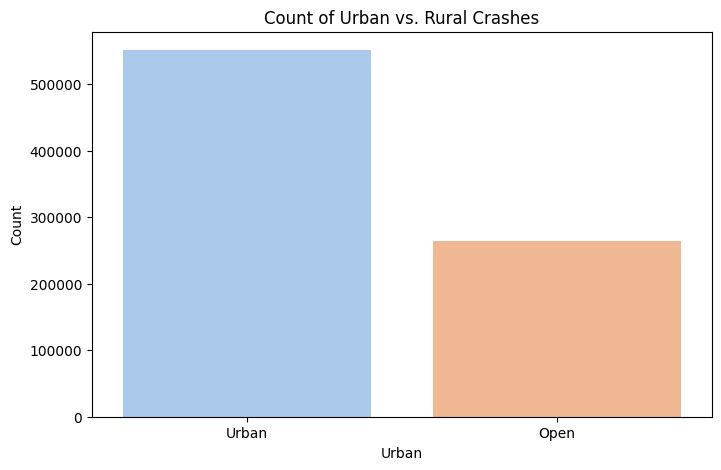

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='urban', data=df, palette='pastel')
plt.title('Count of Urban vs. Rural Crashes')
plt.xlabel('Urban')
plt.ylabel('Count')
plt.show()


# Modelling

All modelling will be done here

# Conclusion

Conclusion will be on this part